# Predicting MLB Team Wins per Season


# 1. Introduction/Business Problem

Sports result prediction is nowadays very popular among fans around the world, 
mostly due to
the expansion of sports betting. Major League Baseball
(MLB) is a multi-billion dollar statistically filled business, and many people are strongly interested in developing systems with the aim of providing the best prediction of the winner in
many specific baseball games. Some effort has been made, but
the majority of the systems created are human based benchmarked and sometimes do not work
with the right dataset. Hence, users are often strongly influenced by emotions and even the
experts find it difficult to select correct evaluative criteria of performance for specific teams in
certain situations. One approach to surpass these and other problems in the sport forecasting
domain is using machine learning methods. In this study, I performed and analyzed various machine learning methods to predict MLB wins per season.

# 2. Data

In [ ]:
# Import data to DataFrames
import pandas as pd

## 2.1 Reading the Data

### 2.1.1 MLB Data

The data for this project came from the [Lahman database] (http://www.seanlahman.com/baseball-archive/statistics/), a respected record of historical baseball data, which I downloaded and placed in a local  database. 

In [ ]:
import pandas as pd

# Importing the dataset
teams_df = pd.read_csv("Teams.csv")

# Print out first 5 rows
print(teams_df.head())

   yearID lgID teamID franchID  ...  PPF  teamIDBR  teamIDlahman45  teamIDretro
0    1871  NaN    BS1      BNA  ...   98       BOS             BS1          BS1
1    1871  NaN    CH1      CNA  ...  102       CHI             CH1          CH1
2    1871  NaN    CL1      CFC  ...  100       CLE             CL1          CL1
3    1871  NaN    FW1      KEK  ...  107       KEK             FW1          FW1
4    1871  NaN    NY2      NNA  ...   88       NYU             NY2          NY2

[5 rows x 48 columns]


In [ ]:
teams_df.shape

(2805, 48)

## 2.2 Cleaning and Preparing the Data

In [ ]:
# Dropping unnecesary column variables.
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin','WSWin','SF','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro']

df = teams_df.drop(drop_cols, axis=1)

# Print out first rows of `df`
print(df.head())

   yearID teamID   G   W    R    AB    H  ...   HA  HRA  BBA  SOA    E  DP    FP
0    1871    BS1  31  20  401  1372  426  ...  367    2   42   23  225 NaN  0.83
1    1871    CH1  28  19  302  1196  323  ...  308    6   28   22  218 NaN  0.82
2    1871    CL1  29  10  249  1186  328  ...  346   13   53   34  223 NaN  0.81
3    1871    FW1  19   7  137   746  178  ...  261    5   21   17  163 NaN  0.80
4    1871    NY2  33  16  302  1404  403  ...  373    7   42   22  227 NaN  0.83

[5 rows x 29 columns]


In [ ]:
df.columns

Index(['yearID', 'teamID', 'G', 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB',
       'SO', 'SB', 'CS', 'HBP', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts',
       'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP'],
      dtype='object')

Null values influence the data quality, which in turn can cause issues with machine learning algorithms.

That’s why will remove those next. There are a few ways to eliminate null values, but it might be a better idea to first display the count of null values for each column and then decide how to best handle them.

In [ ]:
# Print out null values of all columns of `df`
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 144, 859, 2325, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 317, 0]


Three of the columns have a relatively small amount of null values. There are 120 null values in the SO (Strike Outs) column, 144 null vlaues in SB (Stolen Bases)  and 317 in the DP (Double Play) column. Two of the columns have a relatively large amount of them. There are 859 null values in the CS (Caught Stealing) column and 2325 in the HBP (Hit by Pitch) column.

In [ ]:
# Eliminating columns with null values
df = df.drop(['CS','HBP'], axis=1)

# Filling null values
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())
df['SB'] = df['SB'].fillna(df['SB'].median())

# Print out null values of all columns of `df`
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
df.columns

Index(['yearID', 'teamID', 'G', 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB',
       'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA',
       'BBA', 'SOA', 'E', 'DP', 'FP'],
      dtype='object')

In [ ]:
df.shape

(2805, 27)

## 2.2 Exploring and Visualizing the Data

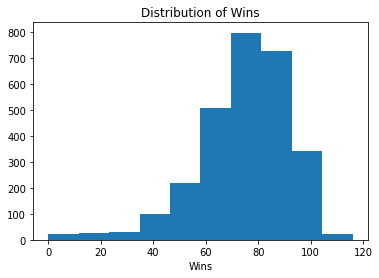

In [ ]:
# import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# matplotlib plots inline  
%matplotlib inline

# Plotting distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

Now, let's check the average wins (W) per year. We use the mean() method for this.

In [ ]:
print(df['W'].mean())

74.74901960784314


In [ ]:
# Creating bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5
    
df['win_bins'] = df['W'].apply(assign_win_bins)

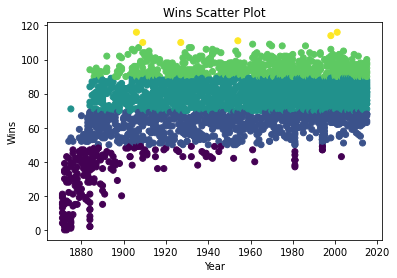

In [ ]:
# Plotting scatter graph of Year vs. Wins
plt.scatter(df['yearID'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

In [ ]:
# Filter for rows where 'yearID' is greater than 1900
df = df[df['yearID'] > 1900]

In [ ]:
# Create runs per year and games per year dictionaries
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        
print(runs_per_year)
print(games_per_year)

{1901: 11068, 1902: 9883, 1903: 9892, 1904: 9307, 1905: 9640, 1906: 8883, 1907: 8698, 1908: 8423, 1909: 8805, 1910: 9580, 1911: 11164, 1912: 11154, 1913: 9964, 1914: 14532, 1915: 14213, 1916: 8889, 1917: 8948, 1918: 7385, 1919: 8657, 1920: 10762, 1921: 11935, 1922: 12059, 1923: 11874, 1924: 11722, 1925: 12596, 1926: 11443, 1927: 11745, 1928: 11645, 1929: 12747, 1930: 13695, 1931: 11892, 1932: 12116, 1933: 10988, 1934: 12000, 1935: 12026, 1936: 12846, 1937: 12070, 1938: 11969, 1939: 11876, 1940: 11568, 1941: 11168, 1942: 9995, 1943: 9694, 1944: 10353, 1945: 10286, 1946: 9953, 1947: 10827, 1948: 11328, 1949: 11426, 1950: 12013, 1951: 11268, 1952: 10349, 1953: 11426, 1954: 10827, 1955: 11069, 1956: 11031, 1957: 10636, 1958: 10578, 1959: 10853, 1960: 10664, 1961: 12942, 1962: 14461, 1963: 12780, 1964: 13124, 1965: 12946, 1966: 12900, 1967: 12210, 1968: 11109, 1969: 15850, 1970: 16880, 1971: 15073, 1972: 13706, 1973: 16376, 1974: 16046, 1975: 16295, 1976: 15492, 1977: 18803, 1978: 17251, 19

In [ ]:
# Create MLB runs per game (per year) dictionary
mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games
    
print(mlb_runs_per_game)

{1901: 4.985585585585586, 1902: 4.431838565022422, 1903: 4.439856373429085, 1904: 3.7257806244995995, 1905: 3.896523848019402, 1906: 3.61685667752443, 1907: 3.527169505271695, 1908: 3.385450160771704, 1909: 3.5475423045930703, 1910: 3.8350680544435547, 1911: 4.512530315278901, 1912: 4.526785714285714, 1913: 4.037277147487845, 1914: 3.8648936170212767, 1915: 3.8125, 1916: 3.5641539695268647, 1917: 3.587810745789896, 1918: 3.6343503937007875, 1919: 3.8716457960644006, 1920: 4.360615883306321, 1921: 4.855573637103336, 1922: 4.870355411954765, 1923: 4.815085158150851, 1924: 4.761169780666125, 1925: 5.128664495114006, 1926: 4.636547811993517, 1927: 4.75121359223301, 1928: 4.729894394800975, 1929: 5.185923515052888, 1930: 5.5490275526742305, 1931: 4.810679611650485, 1932: 4.913219789132198, 1933: 4.481239804241436, 1934: 4.905968928863451, 1935: 4.89657980456026, 1936: 5.188206785137318, 1937: 4.870863599677159, 1938: 4.89329517579722, 1939: 4.823720552396425, 1940: 4.679611650485437, 1941: 

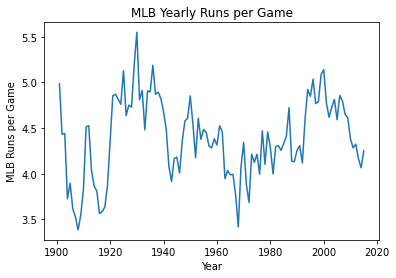

In [ ]:
# Create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

# Create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')

plt.show()

In [ ]:
# Creating "year_label" column, which will give algorithm information about how certain years are related 
# (Dead ball eras, Live ball/Steroid Eras)

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
        
# Add `year_label` column to `df`    
df['year_label'] = df['yearID'].apply(assign_label)

dummy_df = pd.get_dummies(df['year_label'], prefix='era')

# Concatenate `df` and `dummy_df`
df = pd.concat([df, dummy_df], axis=1)

print(df.head())

     yearID teamID    G   W    R  ...  era_4  era_5  era_6  era_7  era_8
383    1901    BLA  135  68  760  ...      0      0      0      0      0
384    1901    BOS  138  79  759  ...      0      0      0      0      0
385    1901    BRO  137  79  744  ...      0      0      0      0      0
386    1901    BSN  140  69  531  ...      0      0      0      0      0
387    1901    CHA  137  83  819  ...      0      0      0      0      0

[5 rows x 37 columns]


In [ ]:
# Create column for MLB runs per game from the mlb_runs_per_game dictionary
def assign_mlb_rpg(year):
    return mlb_runs_per_game[year]

df['mlb_rpg'] = df['yearID'].apply(assign_mlb_rpg)

In [ ]:
# Convert years into decade bins and creating dummy variables
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    
df['decade_label'] = df['yearID'].apply(assign_decade)
decade_df = pd.get_dummies(df['decade_label'], prefix='decade')
df = pd.concat([df, decade_df], axis=1)

# Drop unnecessary columns
df = df.drop(['yearID','year_label','decade_label'], axis=1)

## 2.2 Create new features


In [ ]:
# Create new features for Runs per Game and Runs Allowed per Game
df['R_per_game'] = df['R'] / df['G']
df['RA_per_game'] = df['RA'] / df['G']

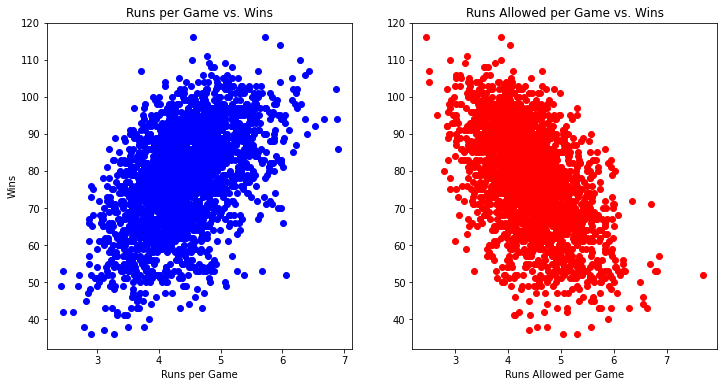

In [ ]:
# Create scatter plots for runs per game vs. wins and runs allowed per game vs. wins
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['R_per_game'], df['W'], c='blue')
ax1.set_title('Runs per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(df['RA_per_game'], df['W'], c='red')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

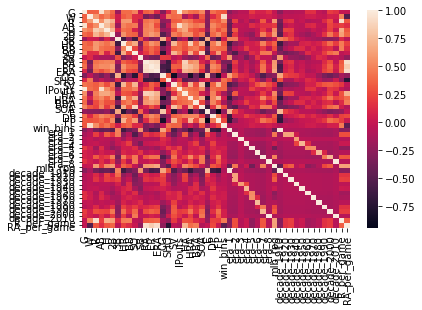

In [ ]:

import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
df.corr()['W']

G              0.347356
W              1.000000
R              0.592600
AB             0.373312
H              0.471549
2B             0.326570
3B             0.042363
HR             0.337004
BB             0.407533
SO             0.136896
SB             0.121191
RA            -0.365395
ER            -0.236483
ERA           -0.383203
CG            -0.044624
SHO            0.447629
SV             0.387201
IPouts         0.412679
HA            -0.140409
HRA            0.067814
BBA           -0.139895
SOA            0.306621
E             -0.264572
DP             0.120167
FP             0.291670
win_bins       0.918019
era_1         -0.117473
era_2         -0.049126
era_3         -0.020816
era_4         -0.019762
era_5          0.069295
era_6          0.034432
era_7          0.036781
era_8          0.059642
mlb_rpg        0.006971
decade_1910   -0.117473
decade_1920   -0.029992
decade_1930   -0.034645
decade_1940   -0.027543
decade_1950   -0.022890
decade_1960    0.050050
decade_1970    0

In [ ]:
attributes = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG',
'SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960','decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','mlb_rpg']

data_attributes = df[attributes]

# Print the first rows of `df`
print(df.head())

    teamID    G   W    R  ...  decade_2000  decade_2010  R_per_game  RA_per_game
383    BLA  135  68  760  ...            0            0    5.629630     5.555556
384    BOS  138  79  759  ...            0            0    5.500000     4.405797
385    BRO  137  79  744  ...            0            0    5.430657     4.379562
386    BSN  140  69  531  ...            0            0    3.792857     3.971429
387    CHA  137  83  819  ...            0            0    5.978102     4.605839

[5 rows x 49 columns]


# 3 Machine Learning Modelling

In [ ]:
# Import necessary modules from `sklearn` 
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data_attributes)
    s_s = metrics.silhouette_score(data_attributes, l)
    s_score_dict[i] = [s_s]

# Print out `s_score_dict`
print(s_score_dict)

{2: [0.38225826317098566], 3: [0.39573360079813497], 4: [0.3562247659644544], 5: [0.2618637051450415], 6: [0.25738921544449944], 7: [0.24129269602234285], 8: [0.2265210053891561], 9: [0.2098103909380921], 10: [0.20236986147645278]}


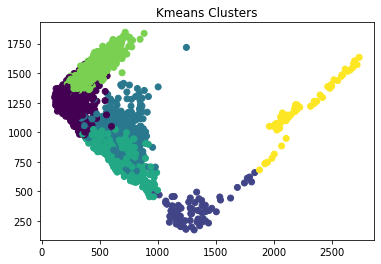

In [ ]:
# Create K-means model and determine euclidian distances for each data point
kmeans_model = KMeans(n_clusters=6, random_state=1)
distances = kmeans_model.fit_transform(data_attributes)

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_

plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')

plt.show()

In [ ]:
# Add labels from K-means model to `df` DataFrame and attributes list
df['labels'] = labels
attributes.append('labels')

# Print the first rows of `df`
print(df.head())

    teamID    G   W    R  ...  decade_2010  R_per_game  RA_per_game  labels
383    BLA  135  68  760  ...            0    5.629630     5.555556       1
384    BOS  138  79  759  ...            0    5.500000     4.405797       1
385    BRO  137  79  744  ...            0    5.430657     4.379562       1
386    BSN  140  69  531  ...            0    3.792857     3.971429       1
387    CHA  137  83  819  ...            0    5.978102     4.605839       1

[5 rows x 50 columns]


In [ ]:
# Create new DataFrame using only variables to be included in models
numeric_cols = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960','decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','mlb_rpg','labels','W']
data = df[numeric_cols]
print(data.head())

# Split data DataFrame into train and test sets
train = data.sample(frac=0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

x_train = train[attributes]
y_train = train['W']
x_test = test[attributes]
y_test = test['W']

       G    R    AB     H   2B  ...  R_per_game  RA_per_game   mlb_rpg  labels   W
383  135  760  4589  1348  179  ...    5.629630     5.555556  4.985586       1  68
384  138  759  4866  1353  183  ...    5.500000     4.405797  4.985586       1  79
385  137  744  4879  1399  206  ...    5.430657     4.379562  4.985586       1  79
386  140  531  4746  1180  135  ...    3.792857     3.971429  4.985586       1  69
387  137  819  4725  1303  173  ...    5.978102     4.605839  4.985586       1  83

[5 rows x 48 columns]


In [ ]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

# Determine mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Print `mae`
print(mae)

2.9681827557755778


In [ ]:
# Import `RidgeCV` from `sklearn.linear_model`
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(x_train, y_train)
predictions_rrm = rrm.predict(x_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

3.0632188890169507
